In [ ]:
#import the libraries 
!pip install yfinance
!pip install pandas_ta 
import yfinance as yf 
import pandas as pd
import pandas_datareader.data as web
import pandas_ta as ta
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
yf.pdr_override()

In [43]:
#load the price data
# serbia dinar for eth, ukraine for doge, japan for xrp, ukraine for ltc, vietnam for bnb, spain for sol, italy for cardano,
#japan for avax, el salvador for btc, new mexico for luna
#el salvador, serbia, vietnam , japon, new mexico, ukraine, (spain,italy),
stocksymbols = ['SVCUSD=X','RSDUSD=X','VNDUSD=X','JPYUSD=X','MXNUSD=X','UAHUSD=X','EURUSD=X']
startdate = datetime(2020,10,1)
end_date = datetime.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data

2022-01-18 20:01:59.166237


In [44]:
salvador_colon = getMyPortfolio('SVCUSD=X')
serbia_dinnar = getMyPortfolio('RSDUSD=X')
vietnamesa = getMyPortfolio('VNDUSD=X')
japan = getMyPortfolio('JPYUSD=X')
mexico = getMyPortfolio('MXNUSD=X')       
ukraine = getMyPortfolio('UAHUSD=X')
europe = getMyPortfolio('EURUSD=X')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
salvador_colon['SMA 30'] = ta.sma(salvador_colon['Close'],30)
salvador_colon['SMA 100'] = ta.sma(salvador_colon['Close'],100)
serbia_dinnar['SMA 30'] = ta.sma(serbia_dinnar['Close'],30)
serbia_dinnar['SMA 100'] = ta.sma(serbia_dinnar['Close'],100)
vietnamesa['SMA 30'] = ta.sma(vietnamesa['Close'],30)
vietnamesa['SMA 100'] = ta.sma(vietnamesa['Close'],100)
japan['SMA 30'] = ta.sma(japan['Close'],30)
japan['SMA 100'] = ta.sma(japan['Close'],100)
mexico['SMA 30'] = ta.sma(mexico['Close'],30)
mexico['SMA 100'] = ta.sma(mexico['Close'],100)
ukraine['SMA 30'] = ta.sma(ukraine['Close'],30)
ukraine['SMA 100'] = ta.sma(ukraine['Close'],100)
europe['SMA 30'] = ta.sma(europe['Close'],30)
europe['SMA 100'] = ta.sma(europe['Close'],100)

In [22]:
def buy_sell_sma(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [49]:
salvador_colon['buy_sma'], salvador_colon['sell_sma'] = buy_sell_sma(salvador_colon)
serbia_dinnar['buy_sma'], serbia_dinnar['sell_sma'] = buy_sell_sma(serbia_dinnar)
vietnamesa['buy_sma'], vietnamesa['sell_sma'] = buy_sell_sma(vietnamesa)
japan['buy_sma'], japan['sell_sma'] = buy_sell_sma(japan)
mexico['buy_sma'], mexico['sell_sma'] = buy_sell_sma(mexico)
ukraine['buy_sma'], ukraine['sell_sma'] = buy_sell_sma(ukraine)
europe['buy_sma'], europe['sell_sma'] = buy_sell_sma(europe)

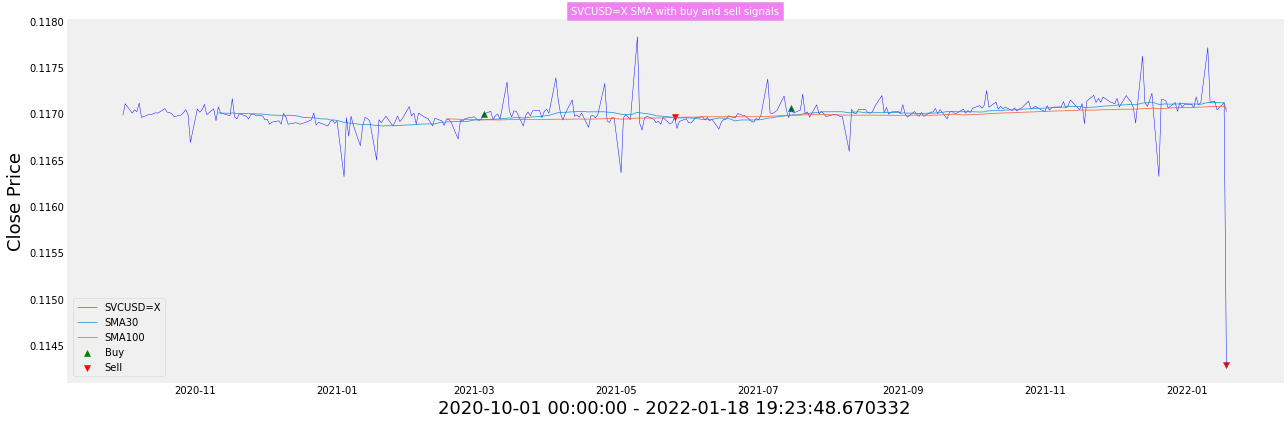

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(salvador_colon['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(salvador_colon['SMA 30'], label = 'SMA30',linewidth=0.8, alpha = 0.85)
ax.plot(salvador_colon['SMA 100'], label = 'SMA100',linewidth=0.8, alpha = 0.85)
ax.scatter(salvador_colon.index , salvador_colon['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(salvador_colon.index , salvador_colon['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

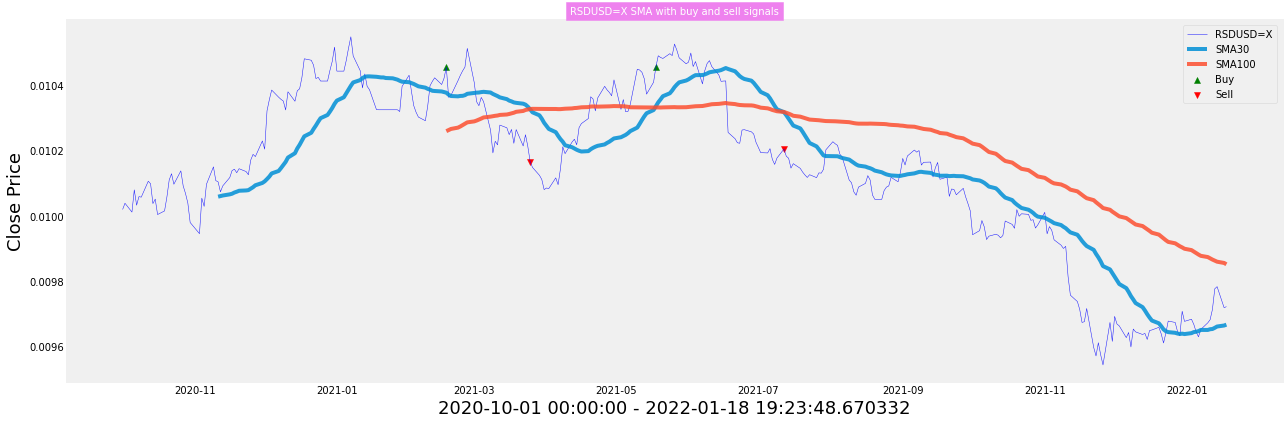

In [40]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(serbia_dinnar['Adj Close'] , label = stocksymbols[1] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(serbia_dinnar['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(serbia_dinnar['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(serbia_dinnar.index , serbia_dinnar['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(serbia_dinnar.index , serbia_dinnar['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[1] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

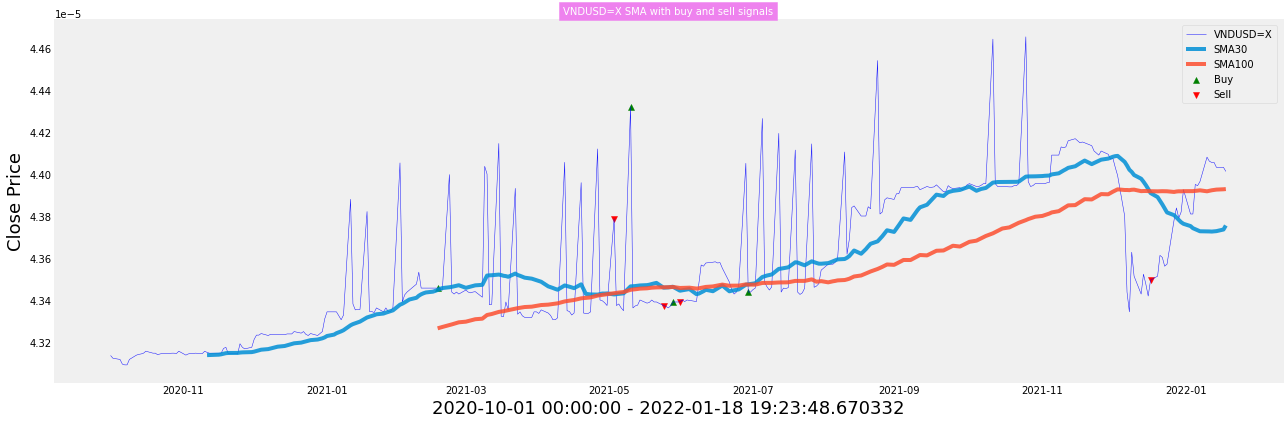

In [41]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(vietnamesa['Adj Close'] , label = stocksymbols[2] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(vietnamesa['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(vietnamesa['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(vietnamesa.index , vietnamesa['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(vietnamesa.index , vietnamesa['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[2] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

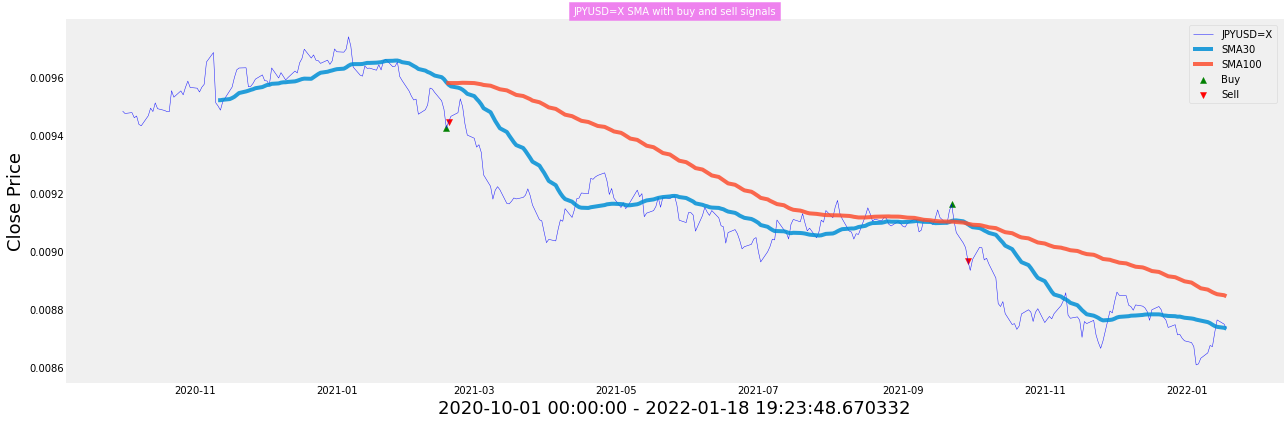

In [42]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(japan['Adj Close'] , label = stocksymbols[3] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(japan['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(japan['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(japan.index , japan['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(japan.index , japan['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[3] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

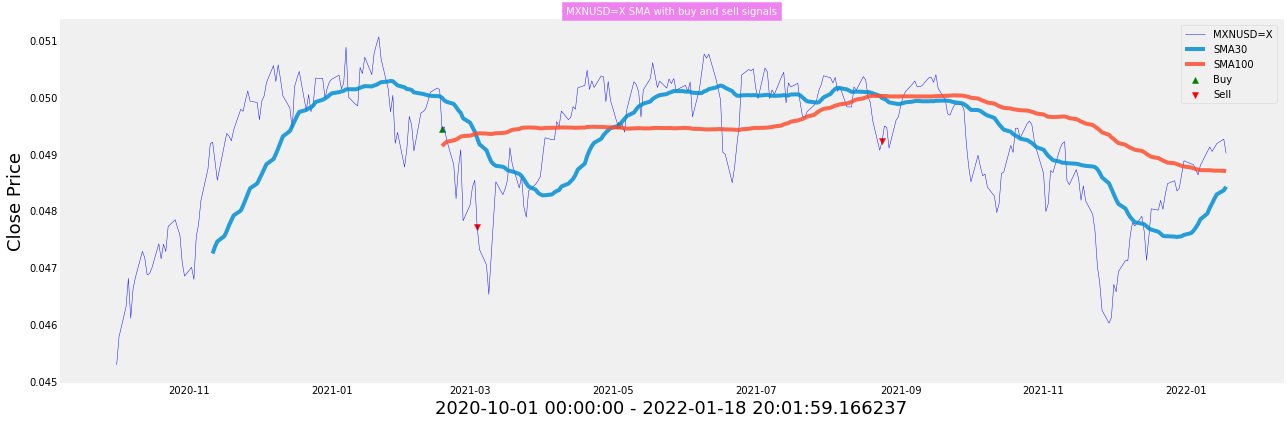

In [50]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(mexico['Adj Close'] , label = stocksymbols[4] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(mexico['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(mexico['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(mexico.index , mexico['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(mexico.index , mexico['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[4] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

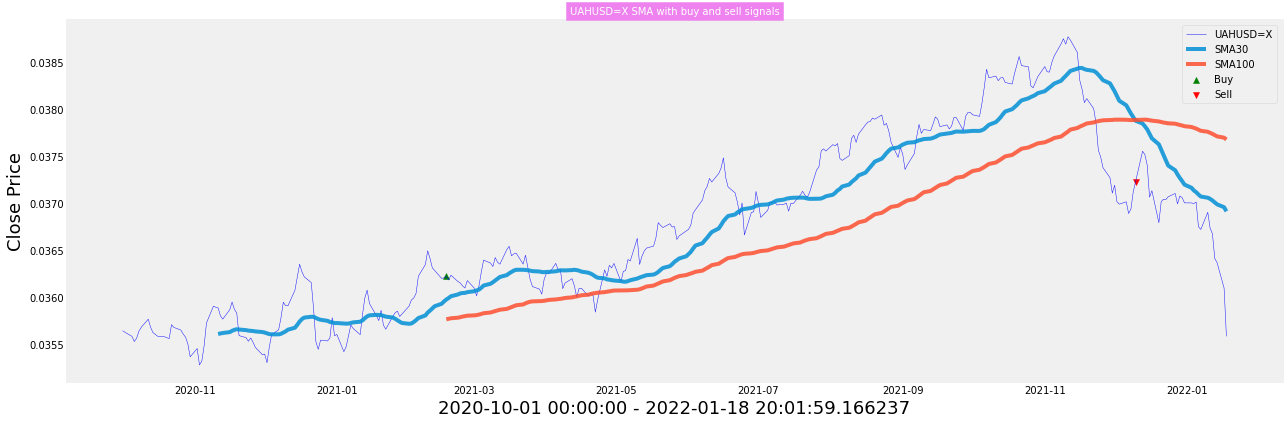

In [51]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(ukraine['Adj Close'] , label = stocksymbols[5] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(ukraine['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(ukraine['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(ukraine.index , ukraine['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(ukraine.index , ukraine['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[5] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

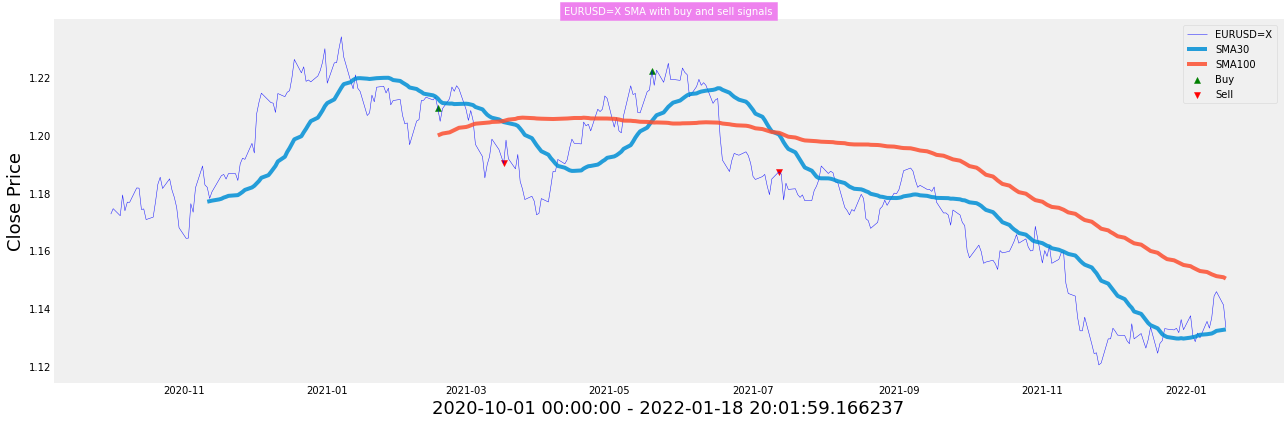

In [52]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(europe['Adj Close'] , label = stocksymbols[6] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(europe['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(europe['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(europe.index , europe['buy_sma'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(europe.index , europe['sell_sma'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[6] + " SMA with buy and sell signals",fontsize=10, backgroundcolor='violet', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [54]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
short_ema = salvador_colon.Close.ewm(span =12, adjust= False).mean()
long_ema = salvador_colon.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [53]:
short_ema = serbia_dinnar.Close.ewm(span =12, adjust= False).mean()
long_ema = serbia_dinnar.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [55]:
short_ema = vietnamesa.Close.ewm(span =12, adjust= False).mean()
long_ema = vietnamesa.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [56]:
short_ema = japan.Close.ewm(span =12, adjust= False).mean()
long_ema = japan.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [57]:
short_ema = mexico.Close.ewm(span =12, adjust= False).mean()
long_ema = mexico.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [58]:
short_ema = ukraine.Close.ewm(span =12, adjust= False).mean()
long_ema = ukraine.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [59]:
short_ema = europe.Close.ewm(span =12, adjust= False).mean()
long_ema = europe.Close.ewm(span=26,adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()

In [60]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['macd'] = macd
salvador_colon['macd_signal'] = signal
serbia_dinnar['macd'] = macd
serbia_dinnar['macd_signal'] = signal
vietnamesa['macd'] = macd
vietnamesa['macd_signal'] = signal
japan['macd'] = macd
japan['macd_signal'] = signal
mexico['macd'] = macd
mexico['macd_signal'] = signal
ukraine['macd'] = macd
ukraine['macd_signal'] = signal
europe['macd'] = macd
europe['macd_signal'] = signal

In [61]:
def buy_sell_macd(signal):
   buy = []
   sell = []
   flag = -1

   for i in range(0, len(signal)):
     if(signal['macd'][i]> signal['macd_signal'][i]):
       sell.append(np.nan)
       if flag != 1:
         buy.append(signal['Close'][i])
         flag = 1
       else:
         buy.append(np.nan)
     elif(signal['macd'][i]< signal['macd_signal'][i]):
       buy.append(np.nan)
       if flag != 0:
         sell.append(signal['Close'][i])
         flag = 0
       else:
         sell.append(np.nan)
     else:
       buy.append(np.nan)
       sell.append(np.nan)
   return (buy,sell)

In [62]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador = buy_sell_macd(salvador_colon)
salvador_colon['buy_signal_macd'] = salvador[0]
salvador_colon['sell_signal_macd'] = salvador[1]

serbia = buy_sell_macd(serbia_dinnar)
serbia_dinnar['buy_signal_macd'] = serbia[0]
serbia_dinnar['sell_signal_macd'] = serbia[1]

vietnam = buy_sell_macd(vietnamesa)
vietnamesa['buy_signal_macd'] = vietnam[0]
vietnamesa['sell_signal_macd'] = vietnam[1]

japanise = buy_sell_macd(japan)
japan['buy_signal_macd'] = japanise[0]
japan['sell_signal_macd'] = japanise[1]

mex = buy_sell_macd(mexico)
mexico['buy_signal_macd'] = mex[0]
mexico['sell_signal_macd'] = mex[1]

ukrain = buy_sell_macd(ukraine)
ukraine['buy_signal_macd'] = ukrain[0]
ukraine['sell_signal_macd'] = ukrain[1]

europ = buy_sell_macd(europe)
europe['buy_signal_macd'] = europ[0]
europe['sell_signal_macd'] = europ[1]

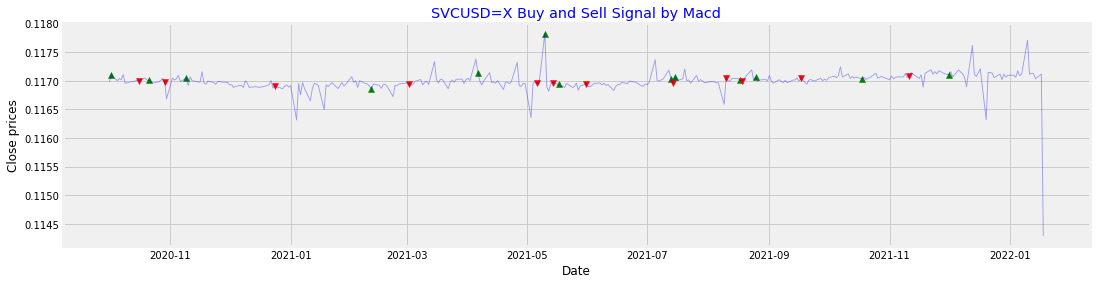

In [64]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[0] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(salvador_colon.index, salvador_colon['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(salvador_colon.index, salvador_colon['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(salvador_colon['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

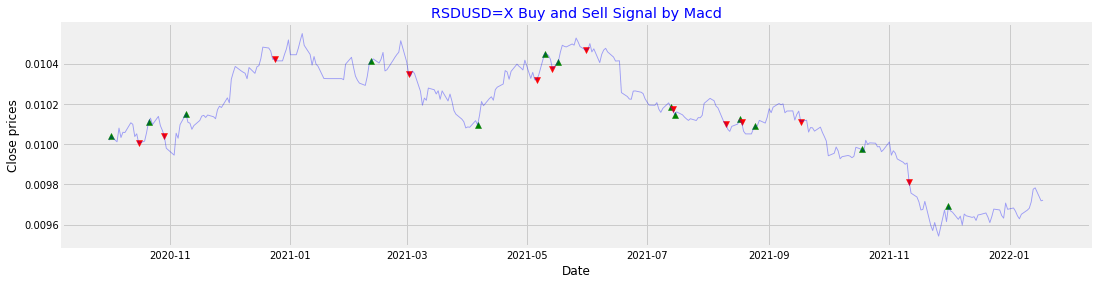

In [65]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[1] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(serbia_dinnar.index, serbia_dinnar['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(serbia_dinnar.index, serbia_dinnar['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(serbia_dinnar['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

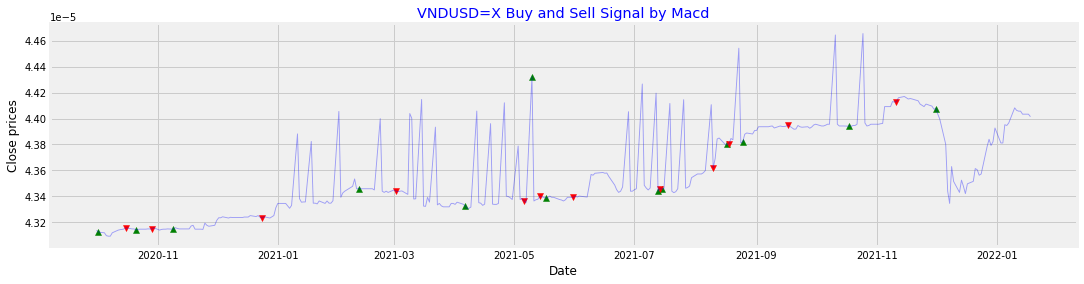

In [66]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[2] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(vietnamesa.index, vietnamesa['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(vietnamesa.index, vietnamesa['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(vietnamesa['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

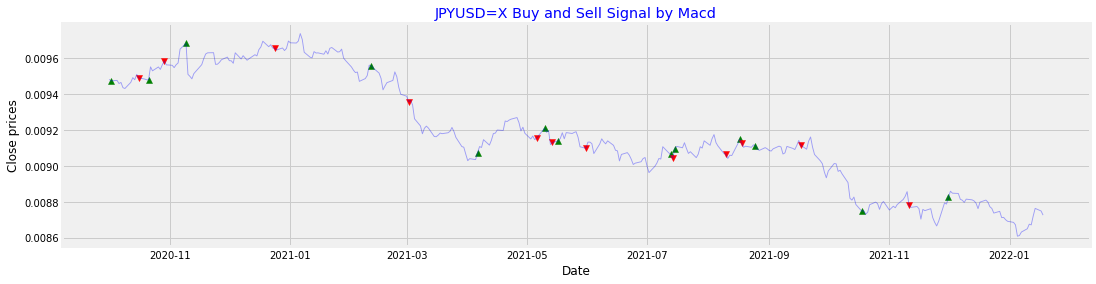

In [67]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[3] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(japan.index, japan['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(japan.index, japan['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(japan['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

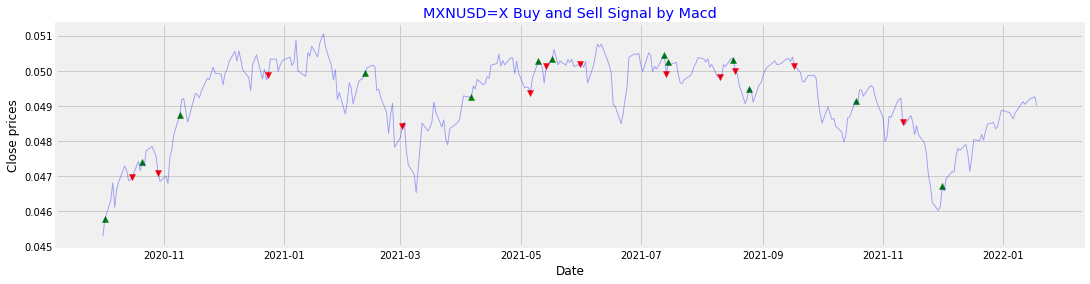

In [68]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[4] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(mexico.index, mexico['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(mexico.index, mexico['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(mexico['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

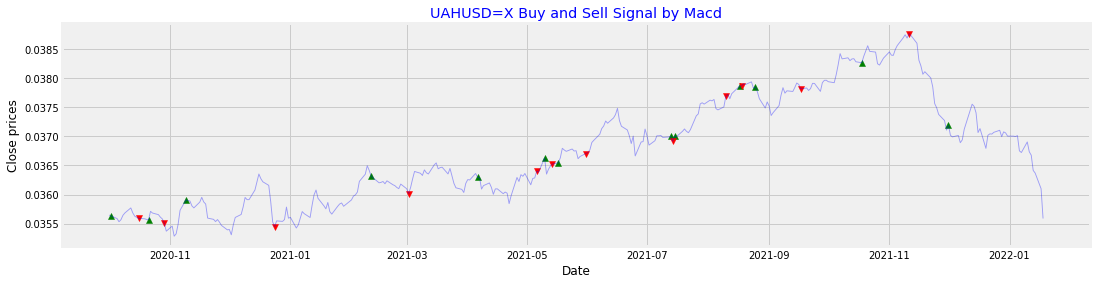

In [69]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[5] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(ukraine.index, ukraine['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(ukraine.index, ukraine['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(ukraine['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

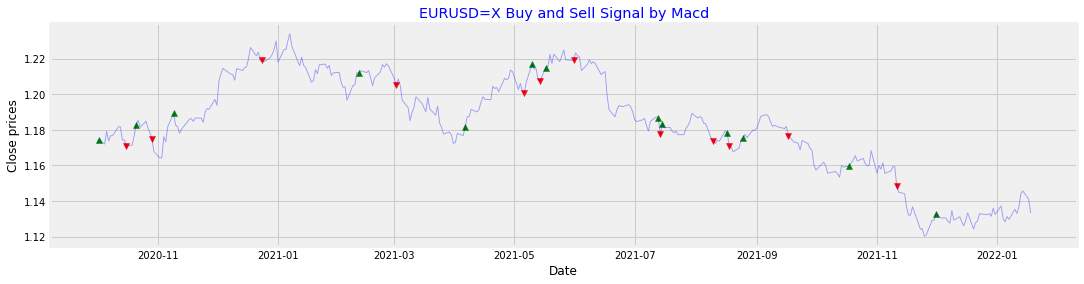

In [70]:
plt.figure(figsize = (16.4,4.1))
plt.title(stocksymbols[6] + ' Buy and Sell Signal by Macd', color='blue')
plt.scatter(europe.index, europe['buy_signal_macd'], label= 'buy', color ='green', marker = '^', alpha=1)
plt.scatter(europe.index, europe['sell_signal_macd'], label='sell', color='red', marker = 'v', alpha=1)
plt.plot(europe['Close'], label = 'Close price', alpha = 0.35, linewidth = 0.90, color ='blue')
plt.xlabel('Date')
plt.ylabel('Close prices')
plt.show()

In [71]:
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

In [73]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['sma_20'] = sma(salvador_colon['Close'], 20)
serbia_dinnar['sma_20'] = sma(serbia_dinnar['Close'], 20)
vietnamesa['sma_20'] = sma(vietnamesa['Close'], 20)
japan['sma_20'] = sma(japan['Close'], 20)
mexico['sma_20'] = sma(mexico['Close'], 20)
ukraine['sma_20'] = sma(ukraine['Close'], 20)
europe['sma_20'] = sma(europe['Close'], 20)

In [74]:
#bollinger method
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [75]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['upper_bb'], salvador_colon['lower_bb'] = bb(salvador_colon['Close'], salvador_colon['sma_20'], 20)
serbia_dinnar['upper_bb'], serbia_dinnar['lower_bb'] = bb(serbia_dinnar['Close'], serbia_dinnar['sma_20'], 20)
vietnamesa['upper_bb'], vietnamesa['lower_bb'] = bb(vietnamesa['Close'], vietnamesa['sma_20'], 20)
japan['upper_bb'], japan['lower_bb'] = bb(japan['Close'], japan['sma_20'], 20)
mexico['upper_bb'], mexico['lower_bb'] = bb(mexico['Close'], mexico['sma_20'], 20)
ukraine['upper_bb'], ukraine['lower_bb'] = bb(ukraine['Close'], ukraine['sma_20'], 20)
europe['upper_bb'], europe['lower_bb'] = bb(europe['Close'], europe['sma_20'], 20)

In [76]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [77]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe

buy_price, sell_price, bb_signal = implement_bb_strategy(salvador_colon['Close'], salvador_colon['lower_bb'], salvador_colon['upper_bb'])
salvador_colon['buy_signal_bb'] = buy_price
salvador_colon['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(serbia_dinnar['Close'], serbia_dinnar['lower_bb'], serbia_dinnar['upper_bb'])
serbia_dinnar['buy_signal_bb'] = buy_price
serbia_dinnar['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(vietnamesa['Close'], vietnamesa['lower_bb'], vietnamesa['upper_bb'])
vietnamesa['buy_signal_bb'] = buy_price
vietnamesa['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(japan['Close'], japan['lower_bb'], japan['upper_bb'])
japan['buy_signal_bb'] = buy_price
japan['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(mexico['Close'], mexico['lower_bb'], mexico['upper_bb'])
mexico['buy_signal_bb'] = buy_price
mexico['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(ukraine['Close'], ukraine['lower_bb'], ukraine['upper_bb'])
ukraine['buy_signal_bb'] = buy_price
ukraine['sell_signal_bb'] = sell_price
buy_price, sell_price, bb_signal = implement_bb_strategy(europe['Close'], europe['lower_bb'], europe['upper_bb'])
europe['buy_signal_bb'] = buy_price
europe['sell_signal_bb'] = sell_price

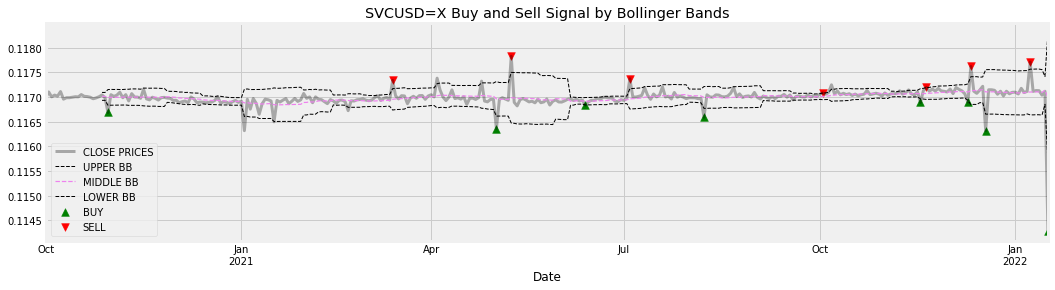

In [86]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
salvador_colon['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
salvador_colon['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
salvador_colon['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(salvador_colon.index, salvador_colon['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(salvador_colon.index, salvador_colon['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[0] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'lower left')
plt.show()

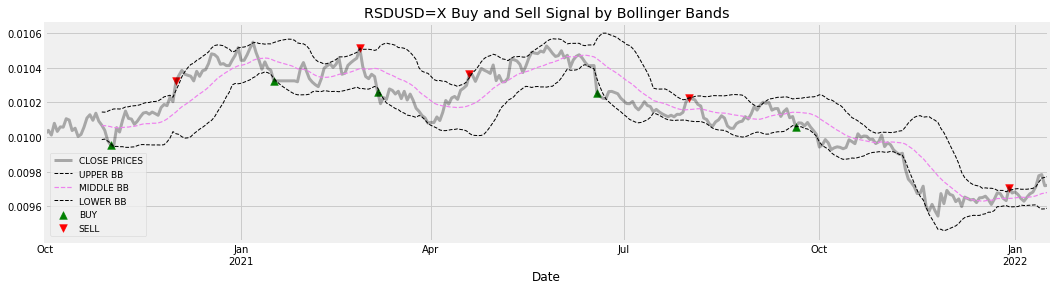

In [91]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
serbia_dinnar['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
serbia_dinnar['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
serbia_dinnar['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
serbia_dinnar['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(serbia_dinnar.index, serbia_dinnar['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(serbia_dinnar.index, serbia_dinnar['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[1] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'lower left',prop={'size': 9})
plt.show()

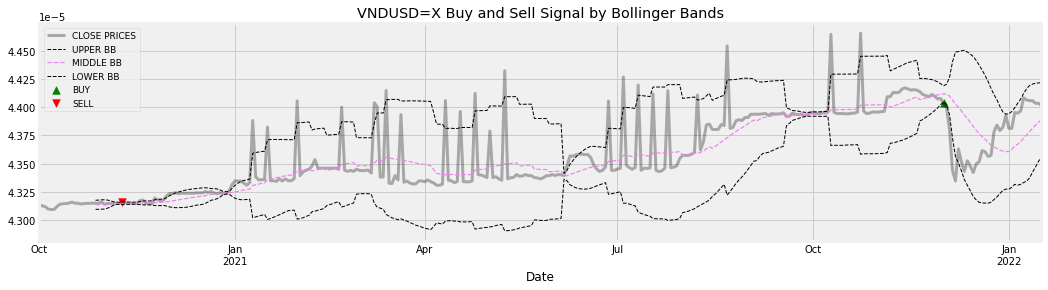

In [93]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
vietnamesa['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
vietnamesa['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
vietnamesa['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
vietnamesa['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(vietnamesa.index, vietnamesa['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(vietnamesa.index, vietnamesa['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[2] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left',prop={'size': 9})
plt.show()

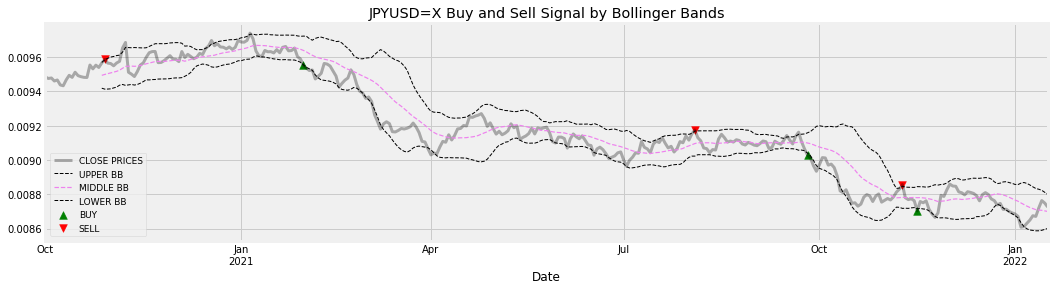

In [94]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
japan['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
japan['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
japan['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
japan['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(japan.index, japan['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(japan.index, japan['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[3] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'lower left',prop={'size': 9})
plt.show()

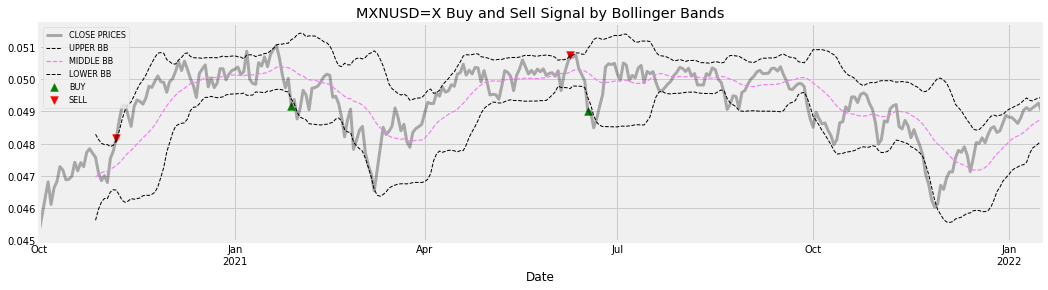

In [97]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
mexico['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
mexico['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
mexico['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
mexico['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(mexico.index, mexico['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(mexico.index, mexico['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[4] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left',prop={'size': 8})
plt.show()

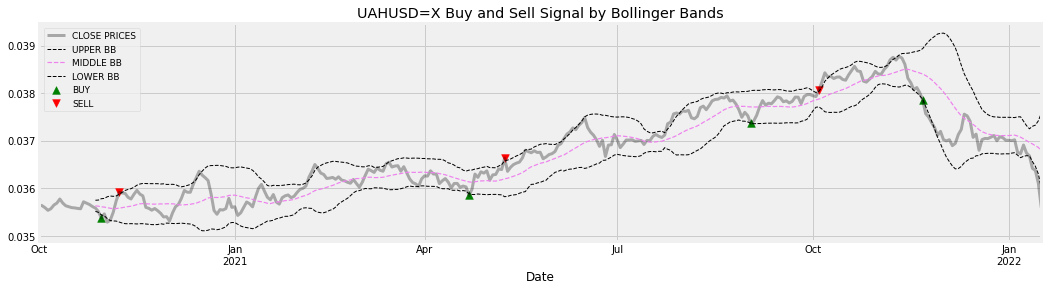

In [99]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
ukraine['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
ukraine['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
ukraine['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
ukraine['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(ukraine.index, ukraine['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(ukraine.index, ukraine['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[5] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'upper left',prop={'size': 9})
plt.show()

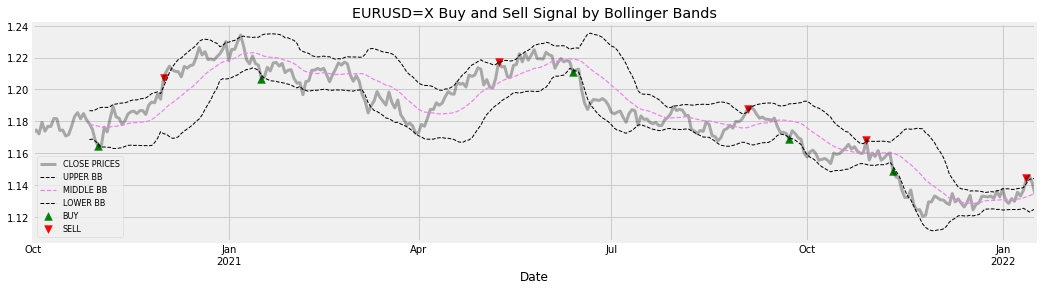

In [101]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
europe['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
europe['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
europe['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'violet')
europe['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(europe.index, europe['buy_signal_bb'], marker = '^', color = 'green', label = 'BUY', s = 60)
plt.scatter(europe.index, europe['sell_signal_bb'], marker = 'v', color = 'red', label = 'SELL', s = 60)
plt.title( stocksymbols[6] + ' Buy and Sell Signal by Bollinger Bands')
plt.legend(loc = 'lower left',prop={'size': 8})
plt.show()

In [102]:
def get_diff(data):
    ma = data.rolling(14).mean()
    di = ((data - ma) / ma) * 100
    return di

In [103]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['disparity'] = get_diff(salvador_colon['Close'])
serbia_dinnar['disparity'] = get_diff(serbia_dinnar['Close'])
vietnamesa['disparity'] = get_diff(vietnamesa['Close'])
japan['disparity'] = get_diff(japan['Close'])
mexico['disparity'] = get_diff(mexico['Close'])
ukraine['disparity'] = get_diff(ukraine['Close'])
europe['disparity'] = get_diff(europe['Close'])

In [104]:
def buy_sell_disparity(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['disparity'][i] > 0:
            if position == False :
                signalBuy.append(data['Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['disparity'][i] < 0:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])

In [106]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['Buy_disparity'], salvador_colon['Sell_disparity'] = buy_sell_disparity(salvador_colon)
serbia_dinnar['Buy_disparity'], serbia_dinnar['Sell_disparity'] = buy_sell_disparity(serbia_dinnar)
vietnamesa['Buy_disparity'], vietnamesa['Sell_disparity'] = buy_sell_disparity(vietnamesa)
japan['Buy_disparity'], japan['Sell_disparity'] = buy_sell_disparity(japan)
mexico['Buy_disparity'], mexico['Sell_disparity'] = buy_sell_disparity(mexico)
ukraine['Buy_disparity'], ukraine['Sell_disparity'] = buy_sell_disparity(ukraine)
europe['Buy_disparity'], europe['Sell_disparity'] = buy_sell_disparity(europe)

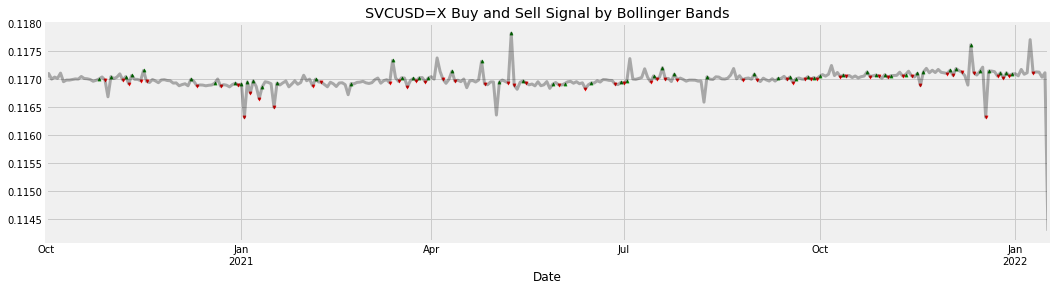

In [113]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
salvador_colon['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(salvador_colon.index, salvador_colon['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(salvador_colon.index, salvador_colon['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[0] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

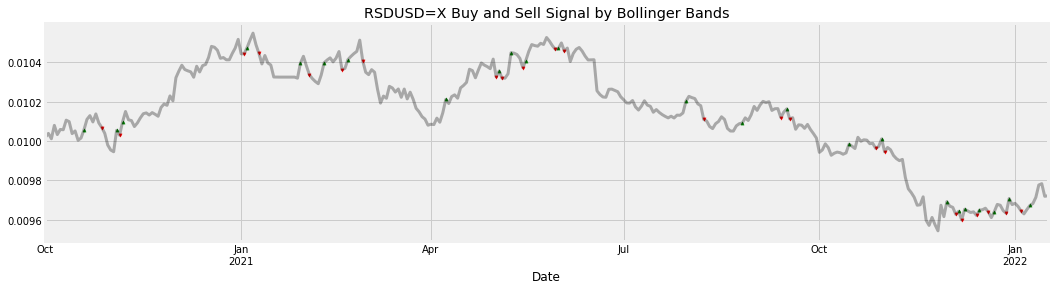

In [114]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
serbia_dinnar['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(serbia_dinnar.index, serbia_dinnar['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(serbia_dinnar.index, serbia_dinnar['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[1] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

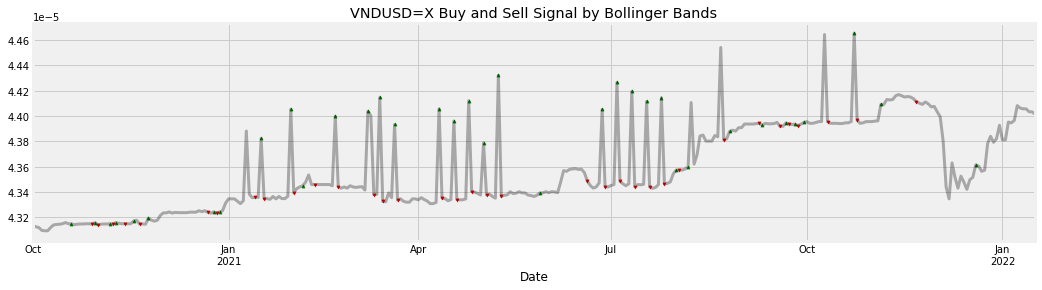

In [115]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
vietnamesa['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(vietnamesa.index, vietnamesa['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(vietnamesa.index, vietnamesa['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[2] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

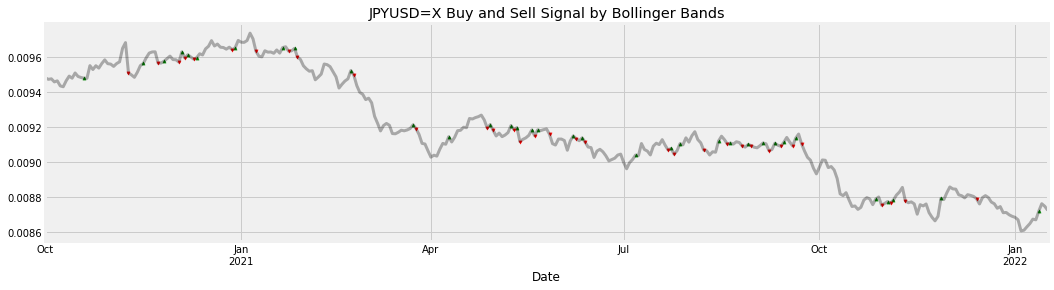

In [116]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
japan['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(japan.index, japan['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(japan.index, japan['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[3] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

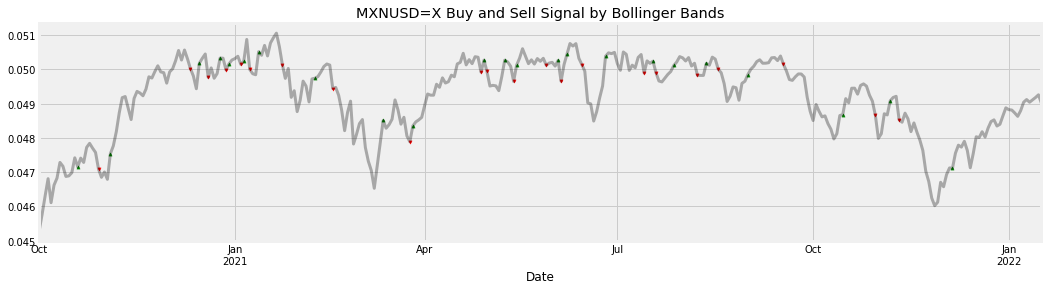

In [117]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
mexico['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(mexico.index, mexico['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(mexico.index, mexico['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[4] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

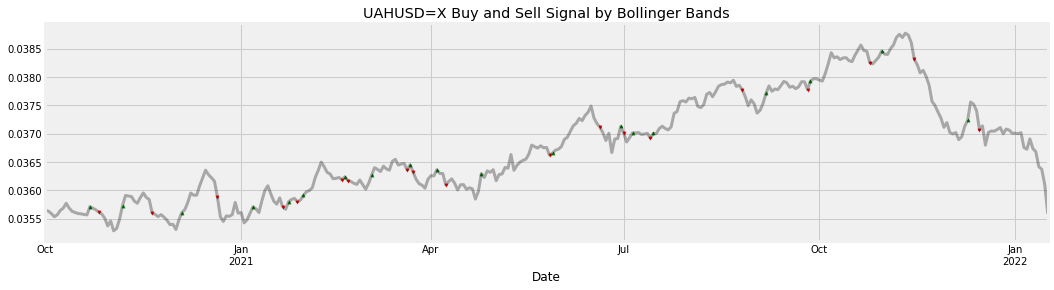

In [118]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
ukraine['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(ukraine.index, ukraine['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(ukraine.index, ukraine['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[5] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()

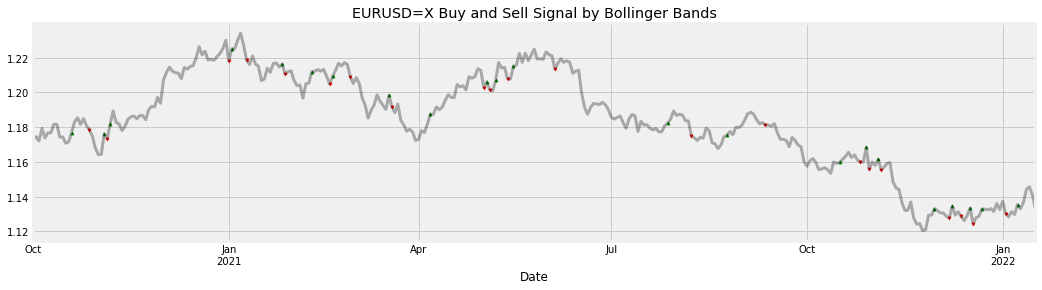

In [119]:
#salvador_colon, serbia_dinnar, vietnamesa,japan,mexico,ukraine, europe
europe['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3,linewidth = 3, color= 'black', figsize =(16,4))
plt.scatter(europe.index, europe['Buy_disparity'], marker = '^', color = 'green', label = 'BUY', s = 10)
plt.scatter(europe.index, europe['Sell_disparity'], marker = 'v', color = 'red', label = 'SELL', s = 10)
plt.title( stocksymbols[6] + ' Buy and Sell Signal by Bollinger Bands')
plt.show()